In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline
import seaborn as sns
import dtale
sns.set()
import warnings
warnings.filterwarnings('ignore')
import lux
from sklearn.preprocessing import MinMaxScaler
pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('parkinsons.data')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


# EDA :-

In [5]:
df.shape

(195, 24)

In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
for i in df.columns:
    print(f'column name: {i}')
    print(df[i].value_counts())
    print('\n')

column name: name
phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: name, Length: 195, dtype: int64


column name: MDVP:Fo(Hz)
119.992    1
169.774    1
156.239    1
145.174    1
138.145    1
          ..
136.969    1
143.533    1
148.090    1
142.729    1
214.289    1
Name: MDVP:Fo(Hz), Length: 195, dtype: int64


column name: MDVP:Fhi(Hz)
157.302    1
191.759    1
195.107    1
198.109    1
197.238    1
          ..
166.607    1
162.215    1
162.824    1
162.408    1
260.277    1
Name: MDVP:Fhi(Hz), Length: 195, dtype: int64


column name: MDVP:Flo(Hz)
74.997     1
151.451    1
79.820     1
80.637     1
81.114     1
          ..
66.004     1
65.809     1
67.343     1
65.476     1
77.973     1
Name: MDVP:Flo(Hz), Length: 195, dtype: int64


column name: MDVP:Jitter(%)
0.00694    3
0.00742    3
0.00369    3
0.0078

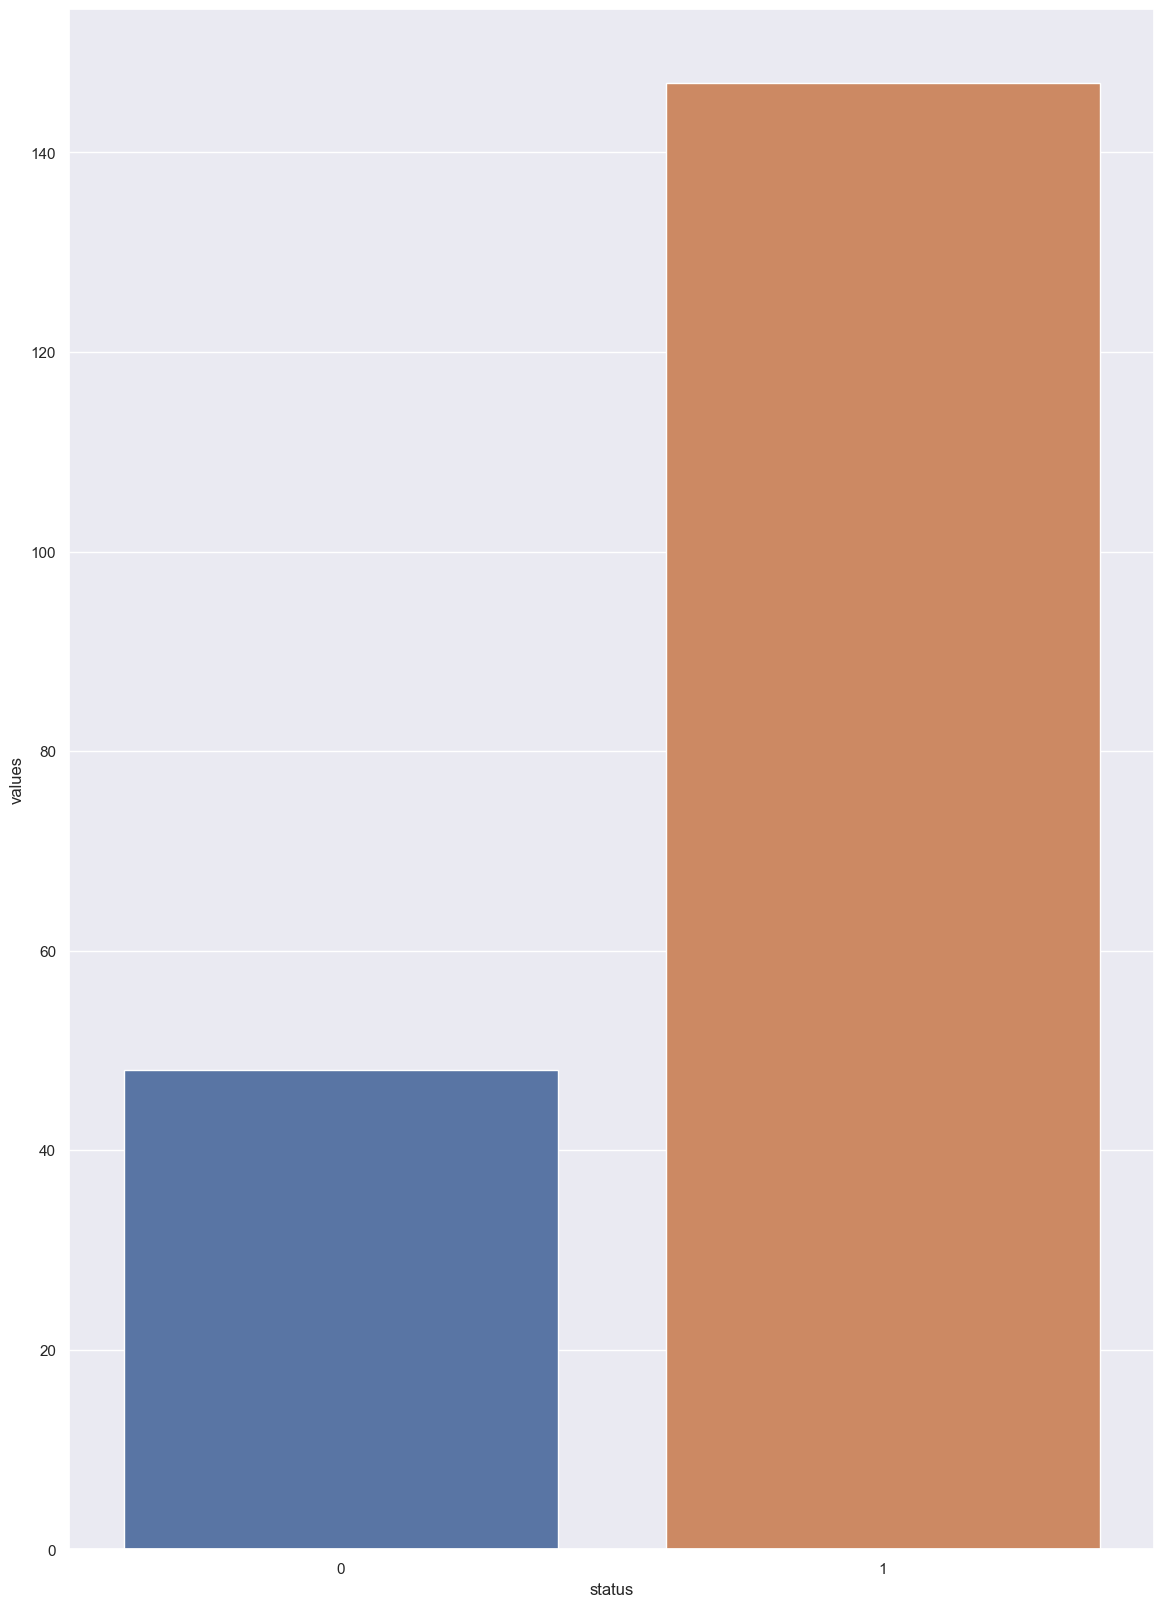

In [8]:
plt.figure(figsize=(14, 20))
sns.countplot(x = 'status', data=df)
plt.ylabel('values')
plt.show()

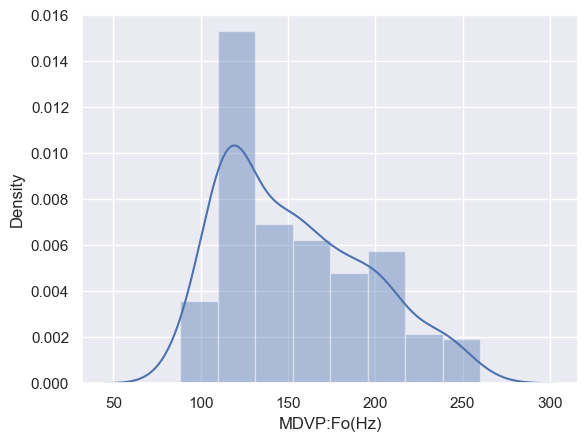

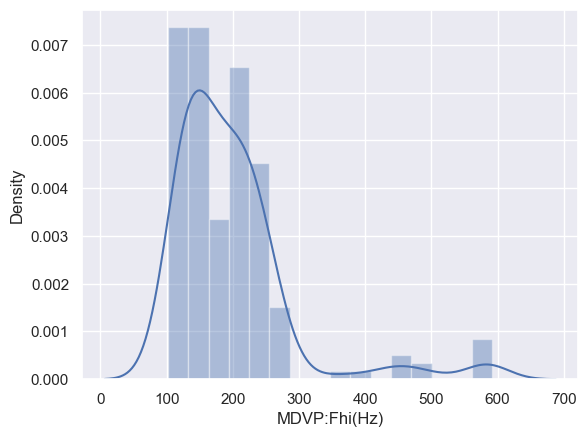

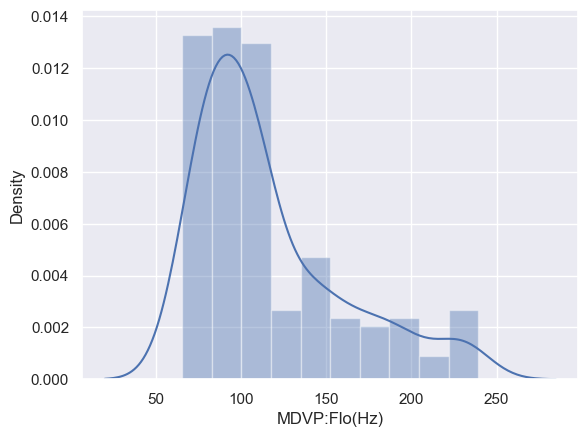

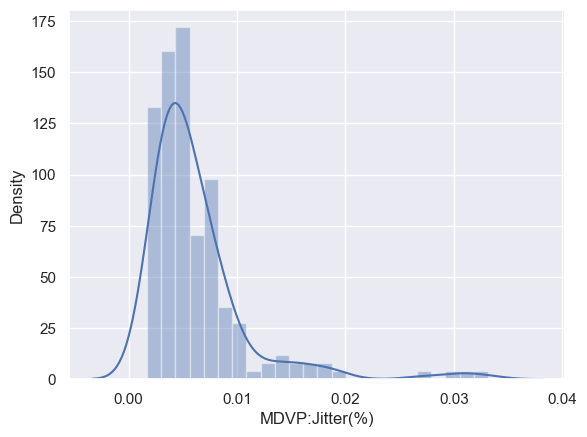

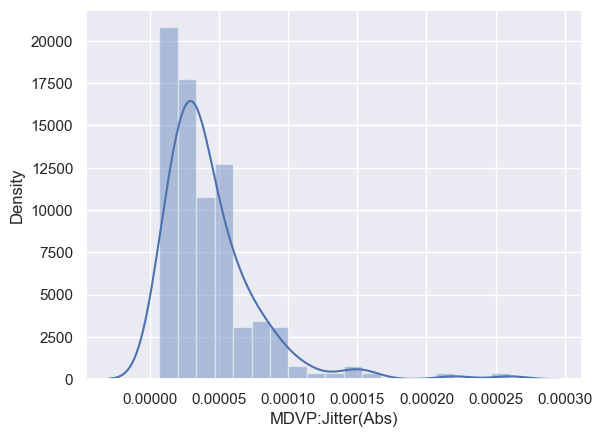

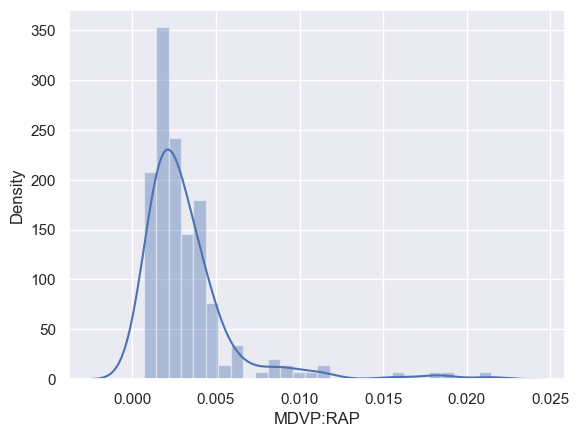

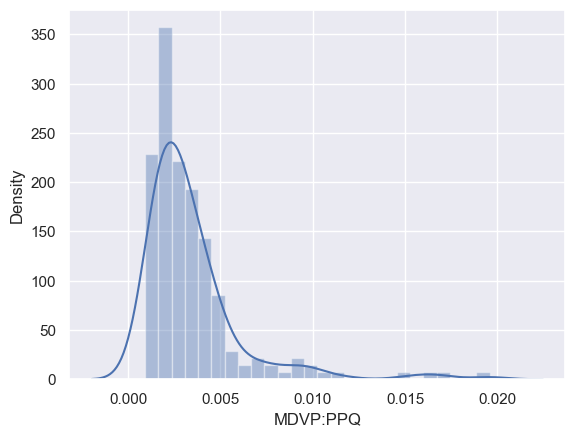

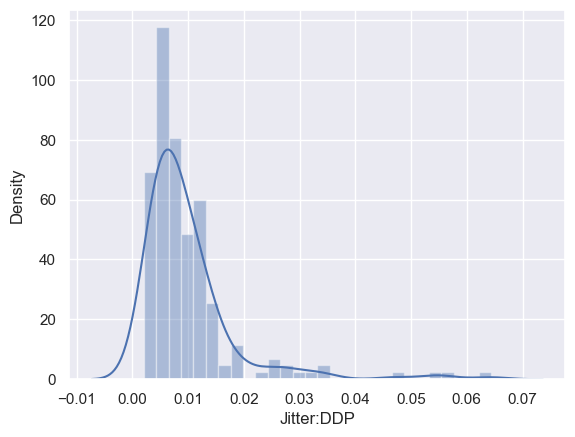

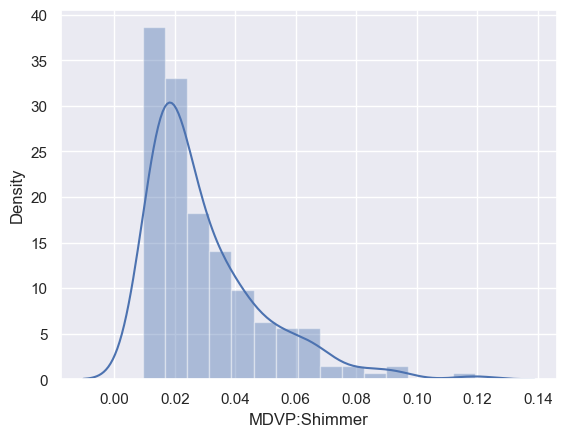

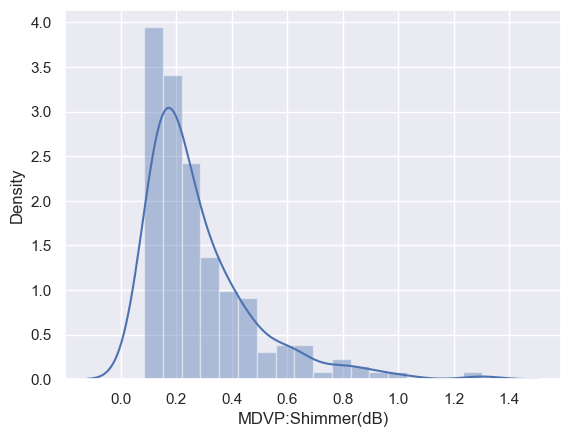

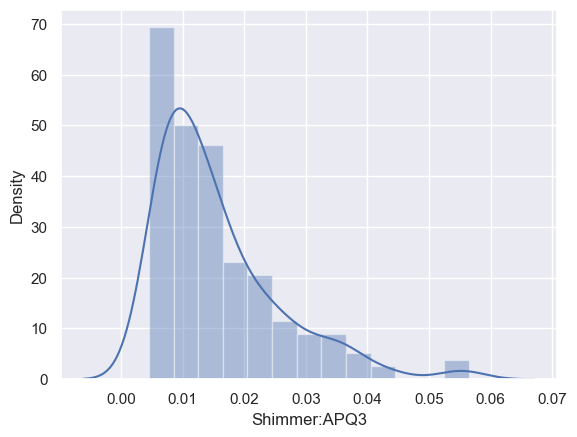

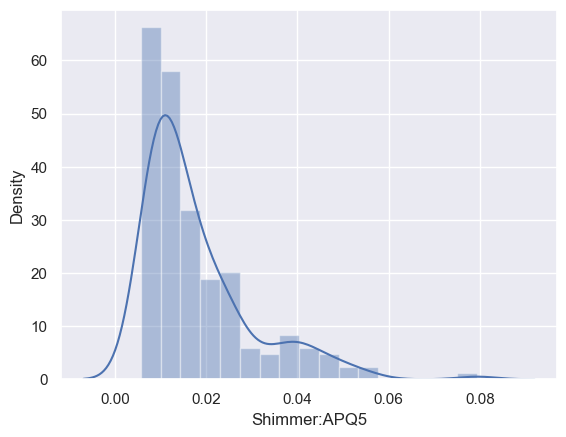

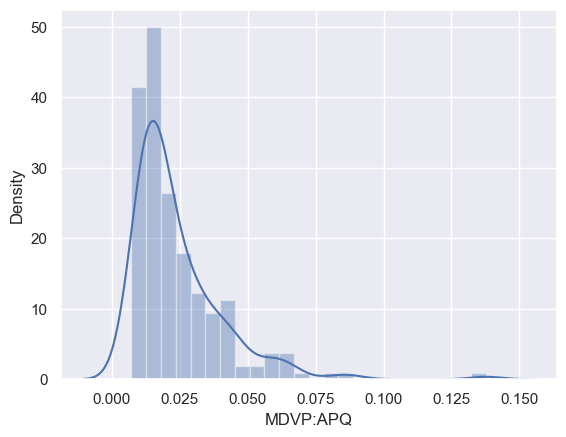

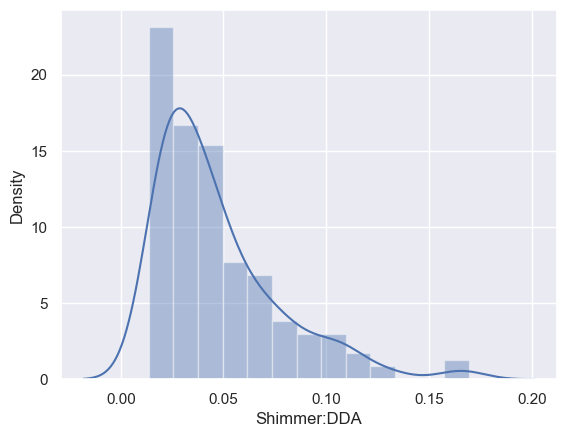

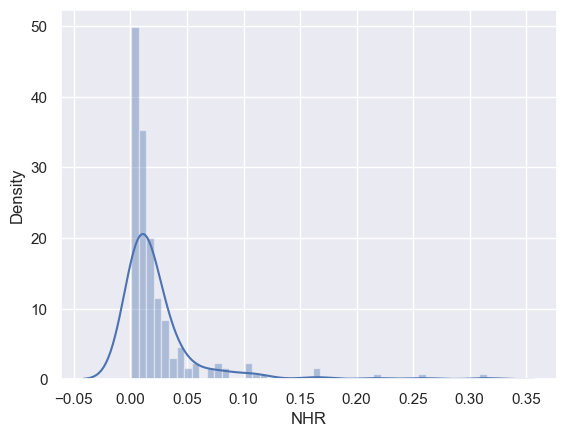

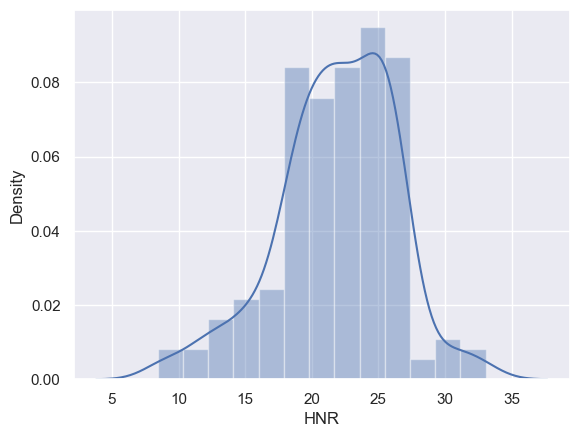

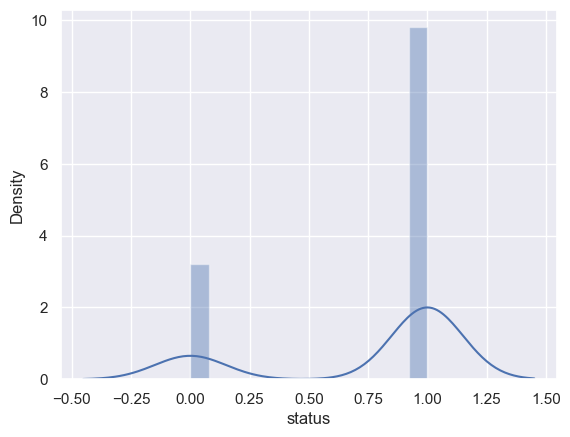

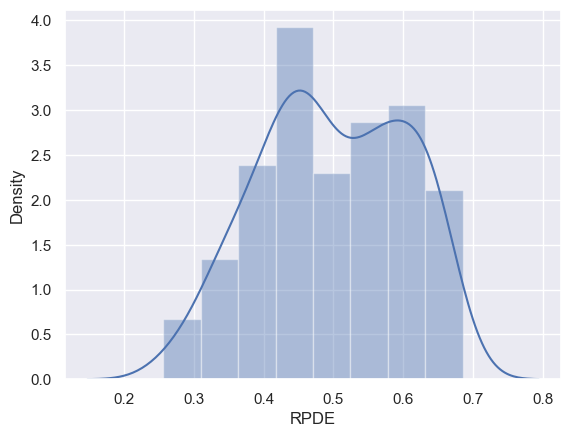

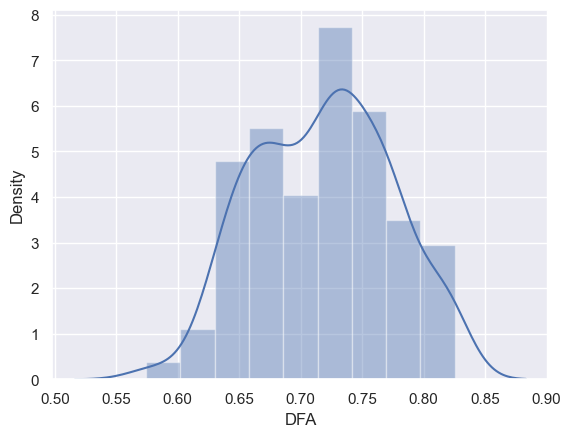

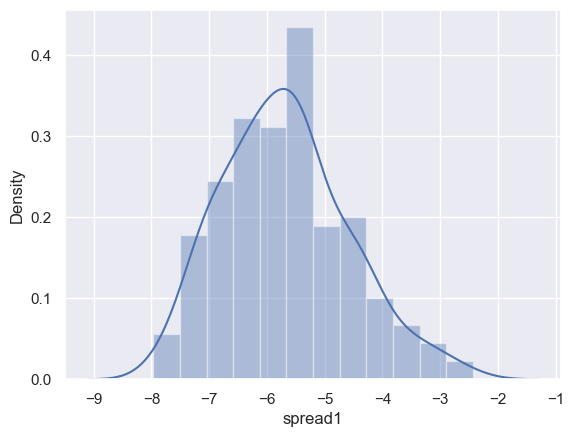

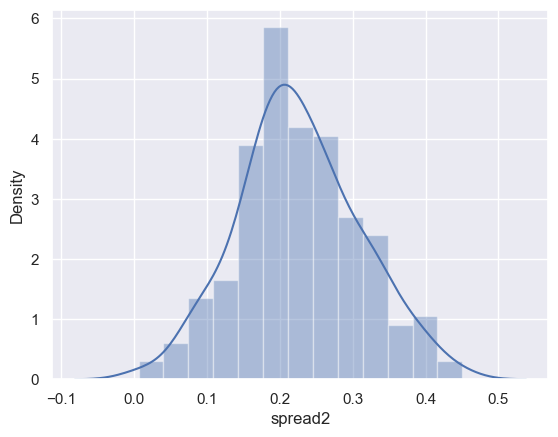

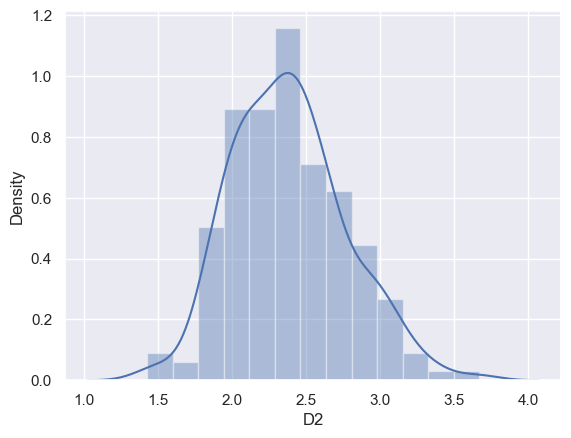

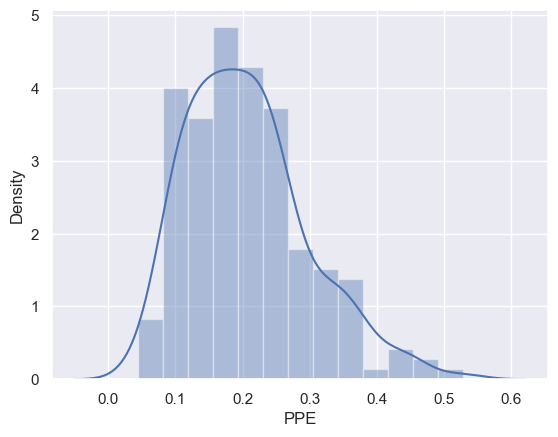

In [9]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

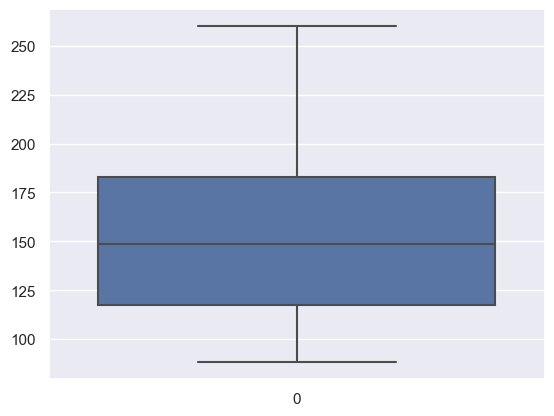

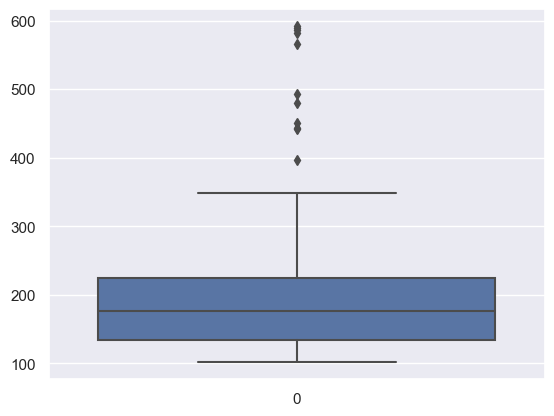

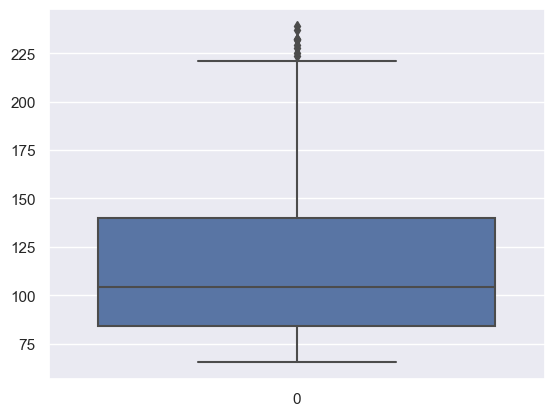

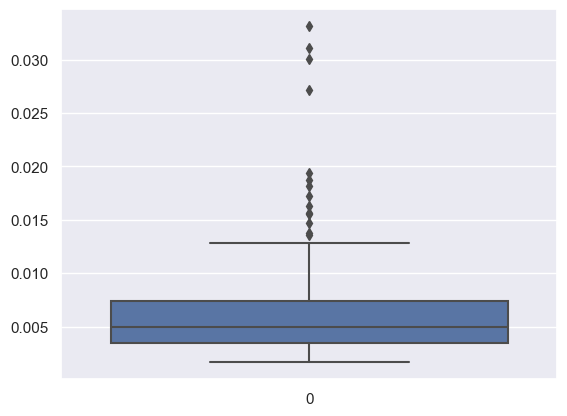

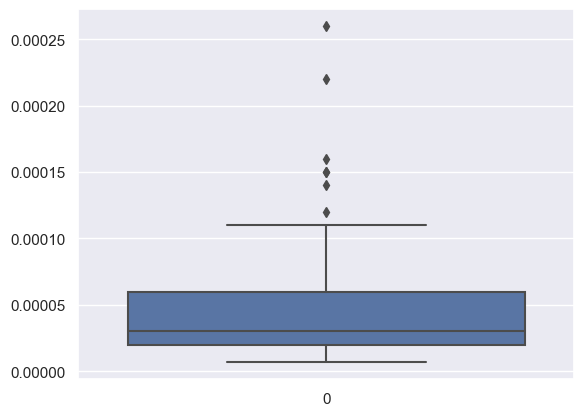

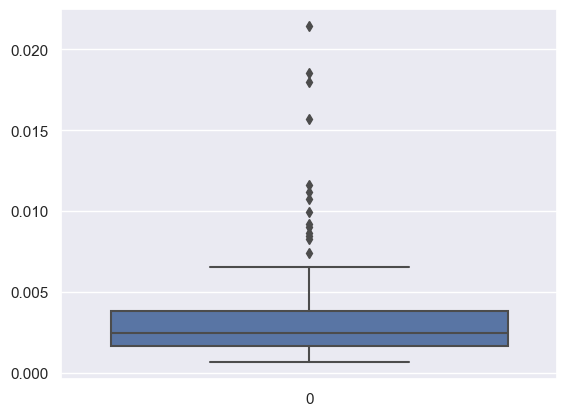

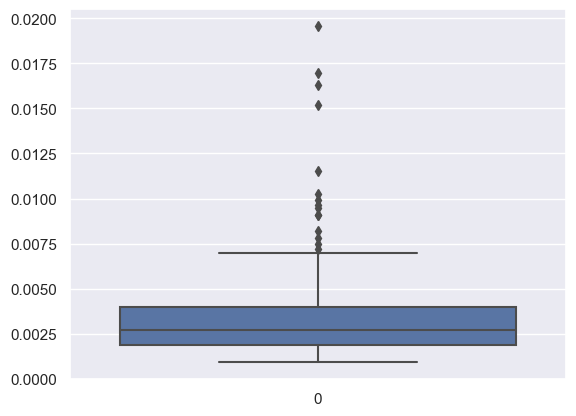

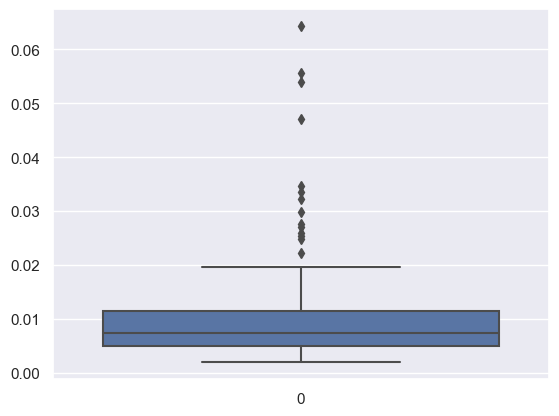

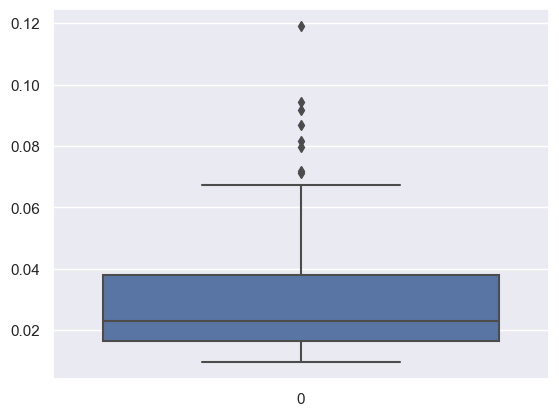

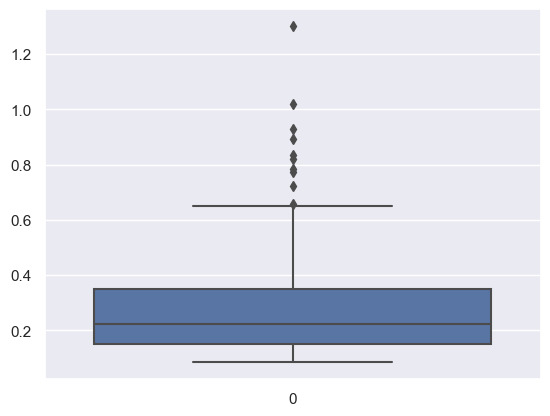

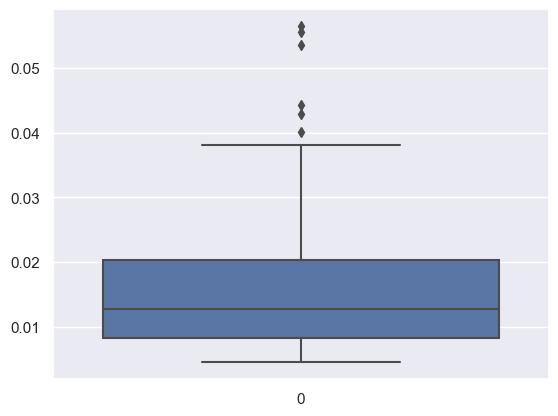

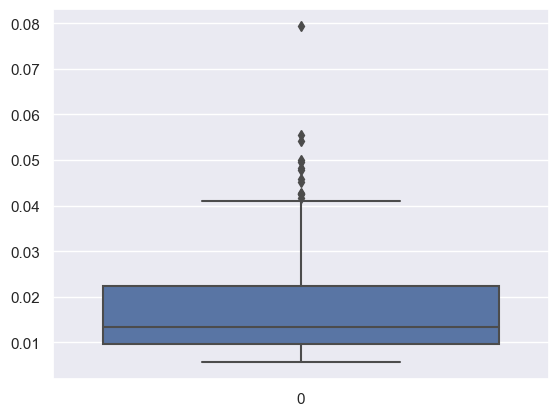

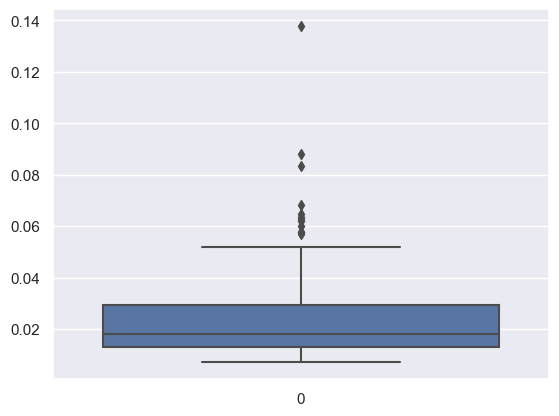

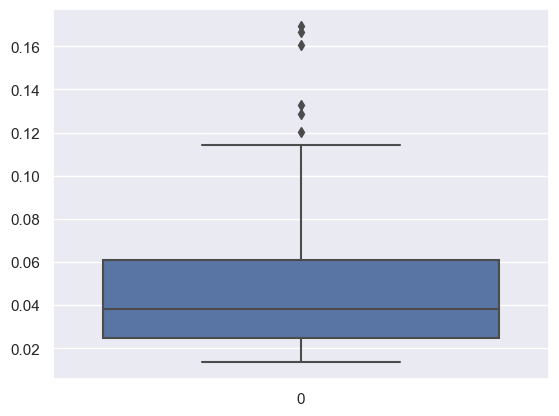

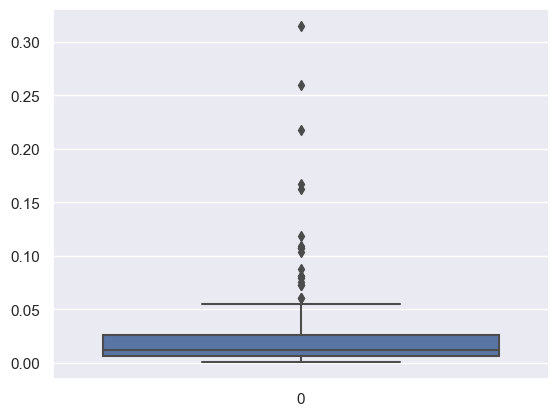

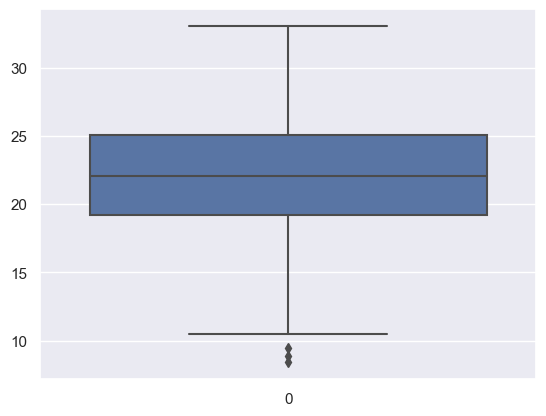

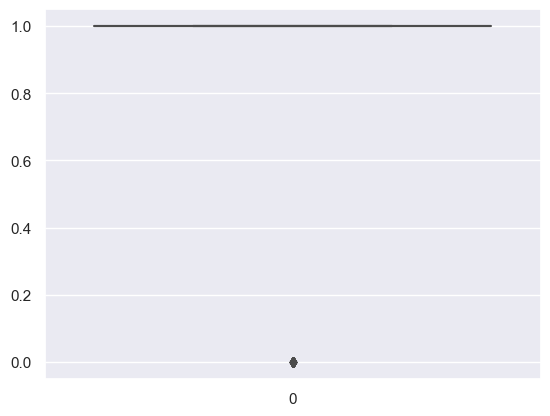

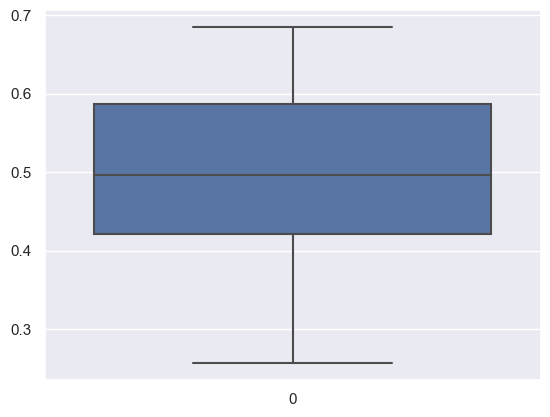

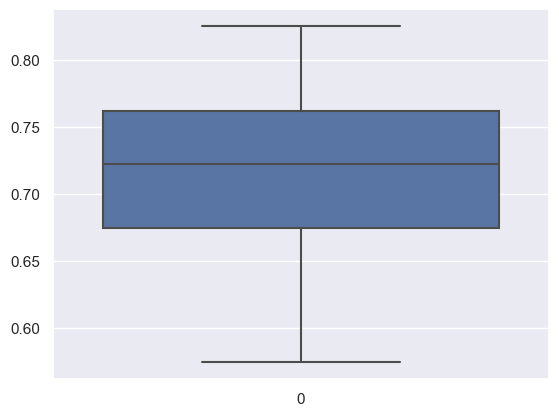

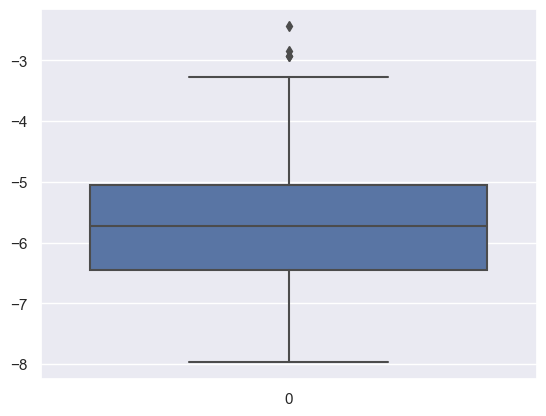

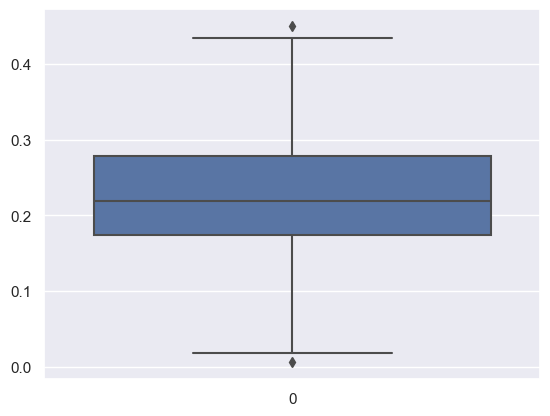

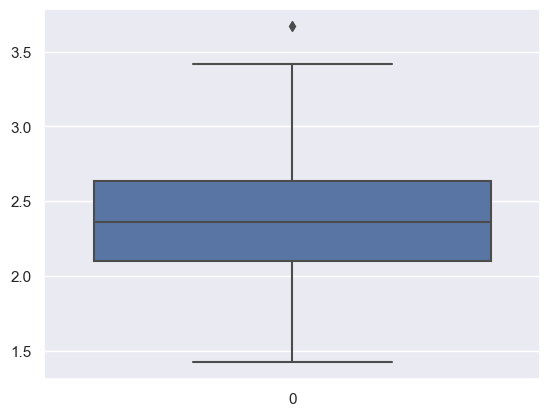

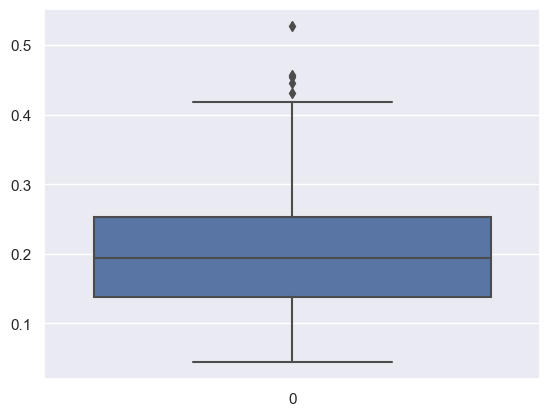

In [10]:
 def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplots(i)

In [11]:
dtale.show(df)

In [16]:
x = df.drop(['name', 'status'], axis=1)
y = df[['status']]

In [18]:
y.value_counts()

status
1         147
0          48
dtype: int64


# Pre-processing :-

## Treating class imbalances :-

In [19]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [20]:
pd.DataFrame(y_ros).value_counts()

0    147
1    147
dtype: int64


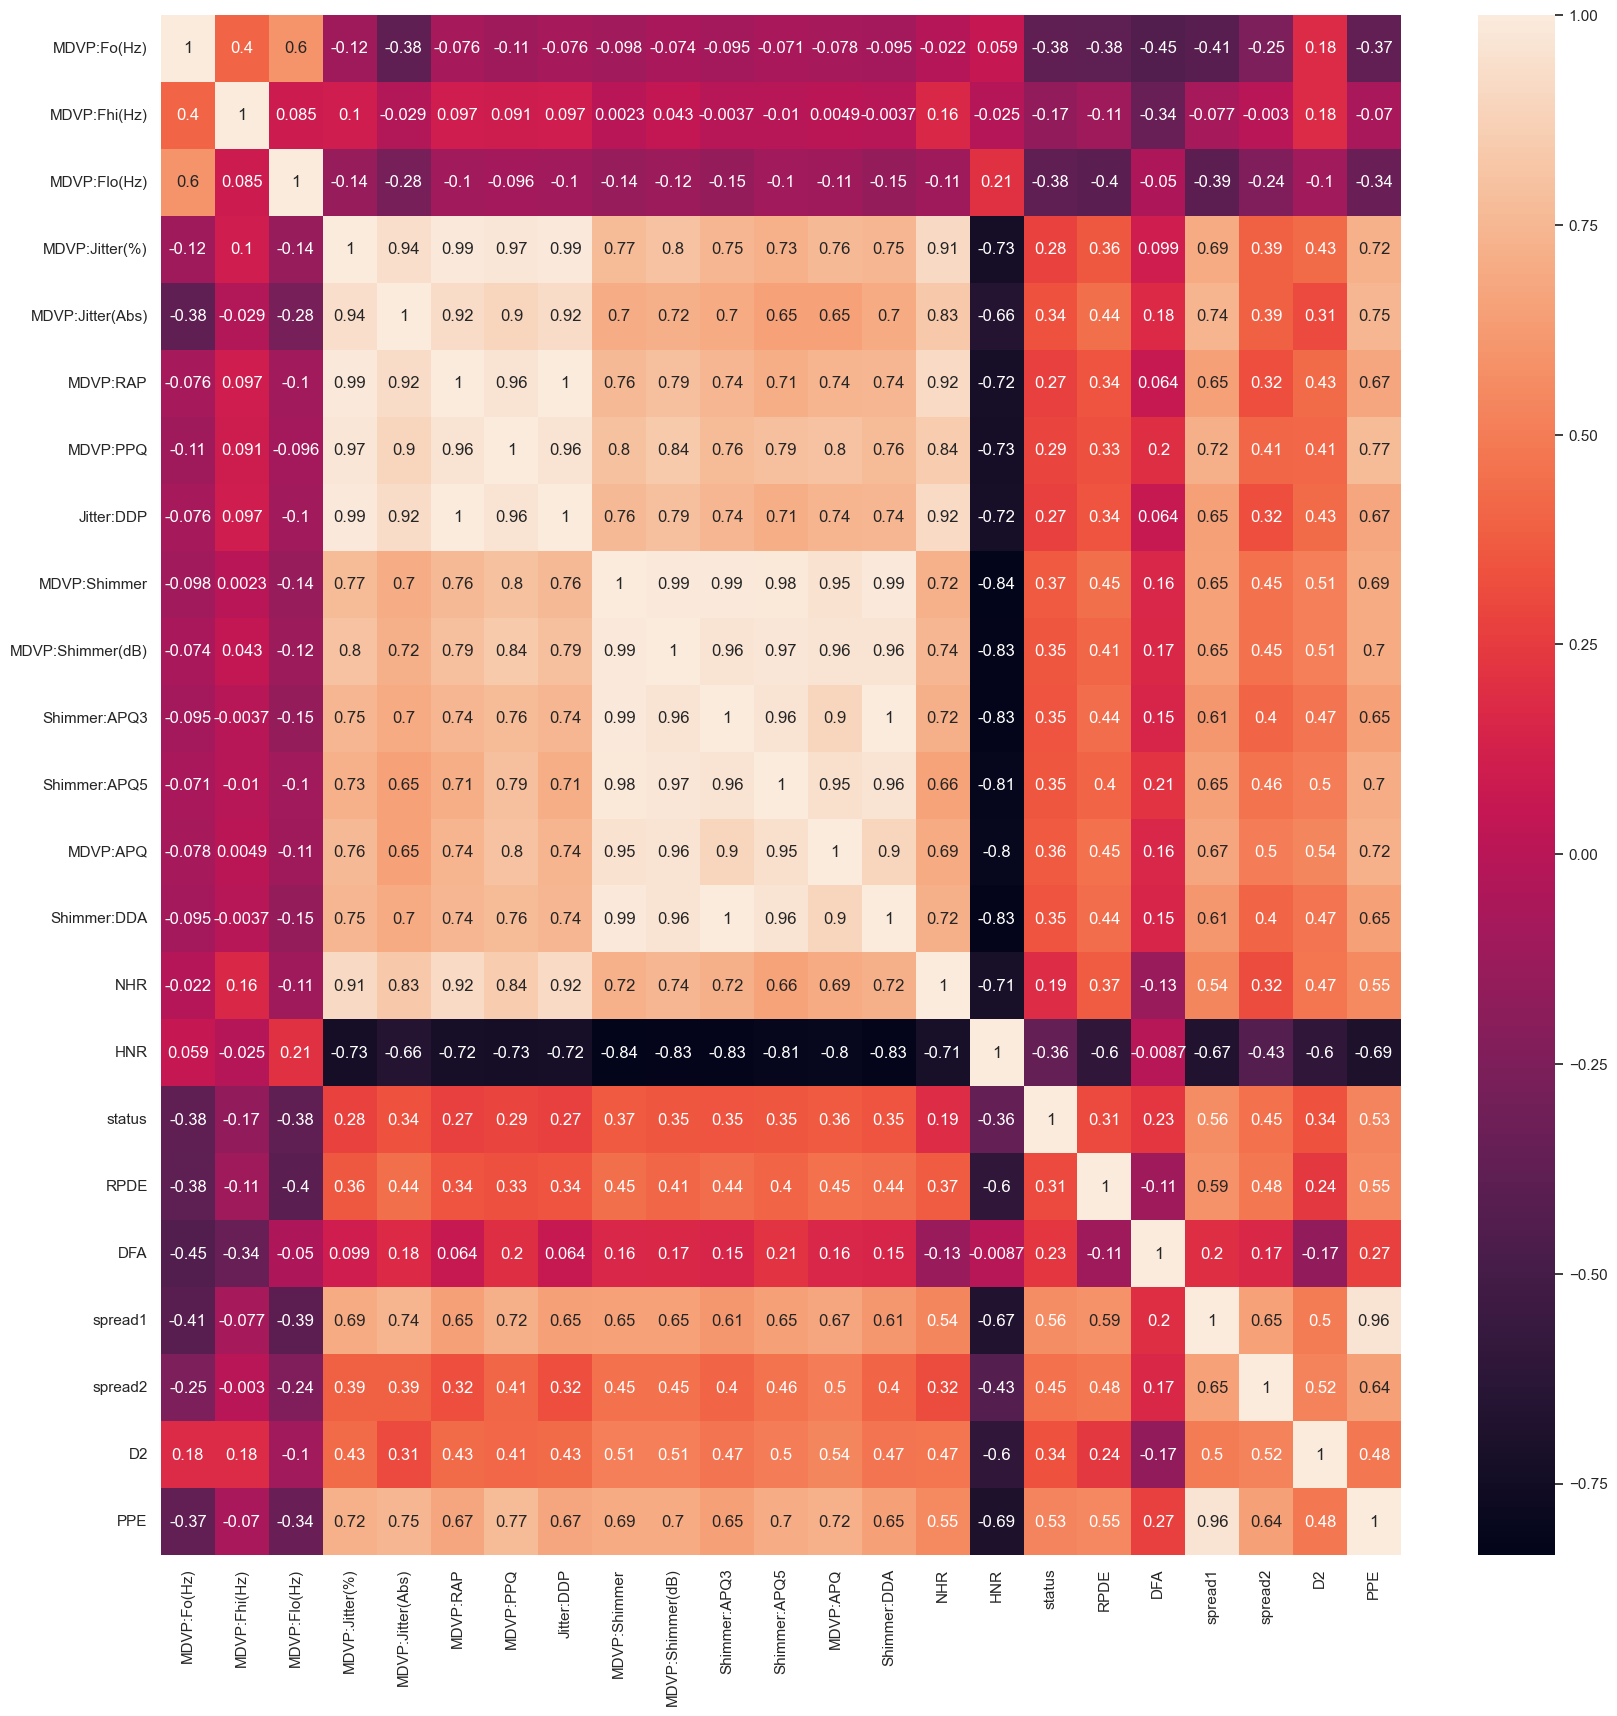

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Normalization :-

In [24]:
sc = MinMaxScaler((-1,1))
x = sc.fit_transform(x_ros)
y = y_ros

In [25]:
x.shape

(294, 22)

## Dimensionality reduction :-

In [27]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


## Training and testing data :-

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=101)

# Model training :-

# Random forest classifier :-

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [30]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Evaluate :-

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Classification score :-

In [33]:
print(classification_report(y_train, y_pred_train))
print('\n')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.89      0.96      0.93        26

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59



## Accuracy score :-

In [34]:
print(accuracy_score(y_train, y_pred_train))
print('\n')
print(accuracy_score(y_test, y_pred_test))

1.0


0.9322033898305084


## Cross-validation score :-

In [48]:
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(rf, x_train, y_train, cv=10)
test_acc = cross_val_score(rf, x_test, y_test, cv=10)

In [49]:
print(f'train mean accuracy : {train_acc.mean()}')
print(f'test mean accuracy : {test_acc.mean()}')

train mean accuracy : 0.9619565217391305
test mean accuracy : 0.8833333333333334


# XG Boost :-

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [43]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

## Classification score :-

In [44]:
print(classification_report(y_train, y_pred_train_xgb))
print('\n')
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.89      0.96      0.93        26

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59



## Accuracy score :-

In [45]:
print(accuracy_score(y_train, y_pred_train_xgb))
print('\n')
print(accuracy_score(y_test, y_pred_test_xgb))

1.0


0.9322033898305084


## Cross-validation score :-

In [50]:
train_acc_xgb = cross_val_score(xgb, x_train, y_train, cv=10)
test_acc_xgb = cross_val_score(xgb, x_test, y_test, cv=10)

In [51]:
print(f'train mean accuracy : {train_acc_xgb.mean()}')
print(f'test mean accuracy : {test_acc_xgb.mean()}')

train mean accuracy : 0.9532608695652176
test mean accuracy : 0.9133333333333334
